In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [3]:
# import comics dataframe
joke_form_path = '/Users/johnpapaioannou/Desktop/insight/project/data/joke_form.pkl'
df = pd.read_pickle(joke_form_path)
df.head()

,comedian,transcript,sim_dist,sim_head,sim_tail,sim_ht,joke_form
0,adam devine,\n[rock music playing]\n[indistinct chatter]\n...,"[0.5672938860919252, 0.057596792635744076, 0.0...",0.567294,0.005439,104.303508,0
1,adam sandler,"\n[man] Okay, ready, and… Take your own cue, A...","[0.5400038091172934, 0.06472848023361816, 0.04...",0.540004,0.007653,70.564428,1
2,adel karam,\nA NETFLIX COMEDY SPECIAL\nRecorded at the Ca...,"[0.6872416689717861, 0.08412475608946268, 0.05...",0.687242,0.012416,55.350280,1
3,al madrigal,\n[dog barks] [FisherGreen’s Sisters Brothers ...,"[0.638331364596691, 0.06769669707868176, 0.037...",0.638331,0.007199,88.673921,0
4,ali wong,"\nLadies and gentlemen, please welcome to the ...","[0.6026607866705188, 0.07803780853788755, 0.04...",0.602661,0.006960,86.587891,0


In [7]:
# internal validation
# one-liner comics: Todd Barry, Mitch Hedberg, Demetri Martin, Anthony Jeselnik, Jimmy Carr, Greg Davies, Lisa Lampanelli, daniel tosh, hannibal buress
# story-tellers: Kevin Smith, Mike Birbiglia, Marc Maron, Stewart Lee, George Carlin, Richard Pryor, trevor noah, bo burnham, big jay oakerson, adam sandler
for i in range(df.shape[0]):
    print(i, df.iloc[i,0], ' head: ', df.iloc[i,3], ' tail: ', df.iloc[i,4], ' h/ht: ', df.iloc[i,5], ' form: ', df.iloc[i,6])
    

0 adam devine  head:  0.5672938860919252  tail:  0.005438876373371759  h/ht:  104.30350814174489  form:  0
1 adam sandler  head:  0.5400038091172934  tail:  0.0076526349193575816  h/ht:  70.56442843645091  form:  1
2 adel karam  head:  0.6872416689717861  tail:  0.0124162274750369  h/ht:  55.35028013569344  form:  1
3 al madrigal  head:  0.638331364596691  tail:  0.0071986369916584025  h/ht:  88.67392054028744  form:  0
4 ali wong  head:  0.6026607866705188  tail:  0.006960104704699044  h/ht:  86.58789087808385  form:  0
5 amy schumer  head:  0.578146537855434  tail:  0.004760918674712233  h/ht:  121.43591969471716  form:  0
6 anjelah johnson  head:  0.6167996276921477  tail:  0.01120448492535836  h/ht:  55.04935138037327  form:  1
7 anthony jeselnik  head:  0.6222395868024106  tail:  0.0035998965003677386  h/ht:  172.84929906702797  form:  0
8 ari shaffir  head:  0.6152664423447849  tail:  0.005224455359324476  h/ht:  117.76661872450933  form:  0
9 aziz ansari  head:  0.59130584034517

106 ricky gervais  head:  0.6283422213777371  tail:  0.010497927339243651  h/ht:  59.85393126401726  form:  1
107 robin williams  head:  0.6672511322600514  tail:  0.007831249944037333  h/ht:  85.2036567633871  form:  0
108 ron white  head:  0.6044979469195857  tail:  0.006222708112385178  h/ht:  97.14386983963486  form:  0
109 rowan atkinson  head:  0.6911244456230974  tail:  0.015784298189320423  h/ht:  43.785566981413766  form:  1
110 roy wood  head:  0.6383981304273997  tail:  0.018122705762286473  h/ht:  35.226424729353184  form:  1
111 russell brand  head:  0.6357395896445253  tail:  0.0032281623400622905  h/ht:  196.93544582775166  form:  0
112 russell howard  head:  0.6439605529922124  tail:  0.006600741356007744  h/ht:  97.55882229896858  form:  0
113 russell peters  head:  0.6284145487676654  tail:  0.017696777084637794  h/ht:  35.51011270369558  form:  1
114 sarah millican  head:  0.6271523874190449  tail:  0.011344957586825188  h/ht:  55.280276071490306  form:  1
115 sarah 

In [130]:
short_forms = [119, 91, 34, 7, 65, 52, 80, 30, 54]
long_forms = [77, 89, 82, 117, 50, 105, 121, 1, 11, 15]

print('h/t: \n', df.iloc[short_forms,5], df.iloc[long_forms,5], '\n\n')
print('short range: \n', df.iloc[short_forms,3], df.iloc[long_forms,3], '\n\n')
print('long range: \n', df.iloc[short_forms,4], df.iloc[long_forms,4], '\n\n')

print('mean short form: \n')
print('short range: ', df[df['joke_form'] == 0].sim_head.mean())
print('long range: ', df[df['joke_form'] == 0].sim_tail.mean())
print('short/long: ', df[df['joke_form'] == 0].sim_ht.mean())

print('mean long form: \n')
print('short range: ', df[df['joke_form'] == 1].sim_head.mean())
print('long range: ', df[df['joke_form'] == 1].sim_tail.mean())
print('short/long: ', df[df['joke_form'] == 1].sim_ht.mean())

h/t: 
 119     196.834332
91     7061.832110
34     1243.662785
7       172.849299
65      145.427671
52      251.066232
80     1215.364950
30      165.632721
54      196.565611
Name: sim_ht, dtype: float64 77     67.844646
89     76.802907
82     85.330510
117    61.695389
50     35.868783
105    52.384542
121    42.593631
1      70.564428
11     65.506444
15     54.947519
Name: sim_ht, dtype: float64 


short range: 
 119    0.562869
91     0.680047
34     0.604329
7      0.622240
65     0.659540
52     0.623078
80     0.595974
30     0.634355
54     0.625285
Name: sim_head, dtype: float64 77     0.519256
89     0.576331
82     0.569617
117    0.593684
50     0.626935
105    0.606012
121    0.621594
1      0.540004
11     0.601540
15     0.663394
Name: sim_head, dtype: float64 


long range: 
 119    0.002860
91     0.000096
34     0.000486
7      0.003600
65     0.004535
52     0.002482
80     0.000490
30     0.003830
54     0.003181
Name: sim_tail, dtype: float64 77     0.007654
89

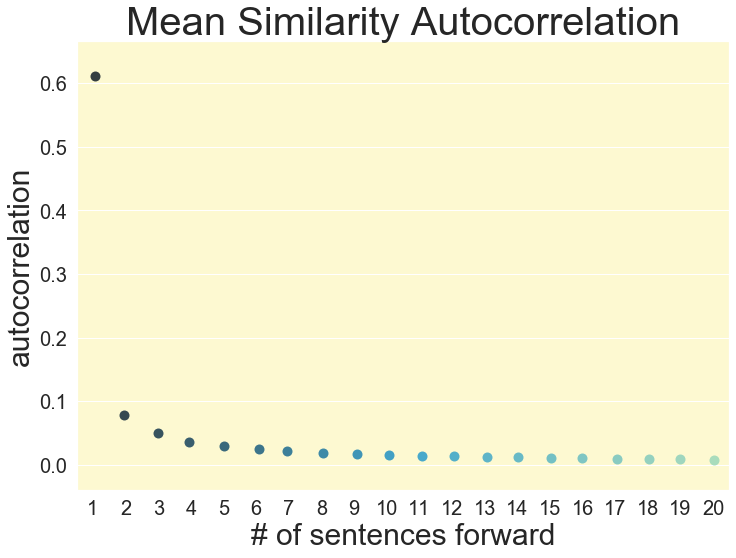

In [81]:
# mean sim_distribution
sns.set(rc={'axes.facecolor':'#fdf9d1', 'figure.facecolor':'white'})


sim_dist_mean = np.zeros(20)
for i in range(df.shape[0]):
    for j in range(20):
        sim_dist_mean[j] += df.iloc[i,2][j]
sim_dist_mean = sim_dist_mean/(df.shape[0])
sim_label = list(range(1,21,1))
plt.rcParams["axes.labelsize"] = 30
fig, ax = plt.subplots()
sns.stripplot(sim_label, sim_dist_mean, palette="GnBu_d", size=10, ax=ax); 
ax.set(xlabel ='# of sentences forward', ylabel ='autocorrelation') 
ax.axes.set_title('Mean Similarity Autocorrelation',fontsize=40)
ax.tick_params(labelsize=20)
fig.set_size_inches(11.7, 8.27)
fig.savefig("mean_similarity.png")

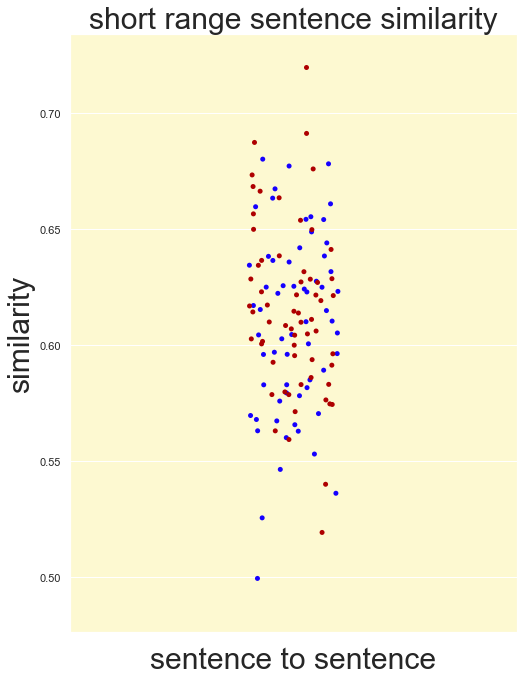

In [141]:
# comparison of tail correlations across groups

tail = np.zeros(3)
tail[0] = df[df['joke_form'] == 0].sim_tail.mean()
tail[1] = df[df['joke_form'] == 1].sim_tail.mean()
tail[2] = df.sim_tail.mean()

fig, ax = plt.subplots()
#sns.stripplot(x = 'joke_form', y='sim_head', data=df, ax=ax)
sns.stripplot(y = df[df['joke_form']==0]['sim_head'], color="#1500ff", size=5, data=df, ax=ax)
sns.stripplot(y = df[df['joke_form']==1]['sim_head'], color="#ae0000", data=df, ax=ax)
plt.rcParams["axes.labelsize"] = 30
ax.set(xlabel ='sentence to sentence', ylabel ='similarity') 
ax.axes.set_title('short range sentence similarity',fontsize=30)
fig.set_size_inches(8, 11)
fig.savefig("short_range_similarity.png")


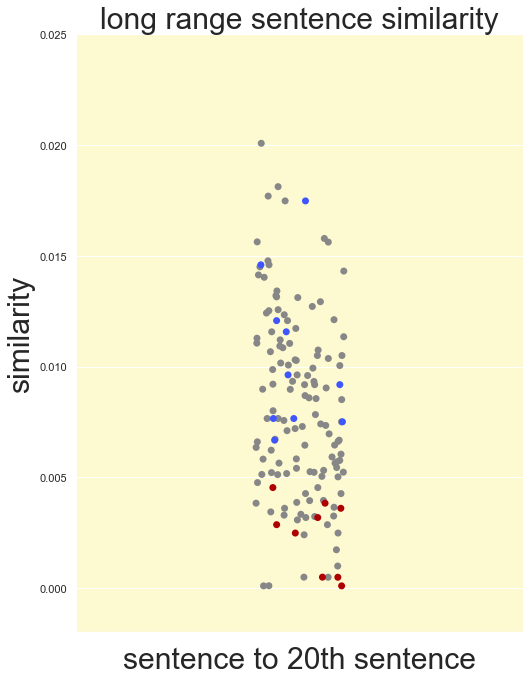

In [133]:
fig, ax = plt.subplots()
#sns.stripplot(x = 'joke_form', y='sim_head', data=df, ax=ax)
sns.stripplot(y = df['sim_tail'], color="#878787", size=7, data=df, ax=ax)
#sns.stripplot(y = df[df['joke_form']==1]['sim_tail'], color="#ae0000", data=df, ax=ax)
sns.stripplot(y = df.iloc[short_forms, 4], color="#ae0000", size=7, data=df, ax=ax)
sns.stripplot(y = df.iloc[long_forms, 4], color="#3f55ff", size=7, data=df, ax=ax)

plt.rcParams["axes.labelsize"] = 30
ax.set(xlabel ='sentence to 20th sentence', ylabel ='similarity') 
ax.axes.set_title('long range sentence similarity',fontsize=30)
ax.set(ylim=(-0.002, 0.025))
fig.set_size_inches(8, 11)
fig.savefig("long_range_similarity.png")